In [326]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [327]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((90, 2), (60, 2))

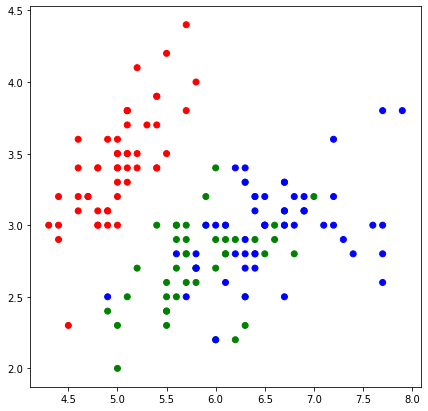

In [329]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [330]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [331]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [332]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, False)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

### Задание 1

#### К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [333]:
def knn(x_train, y_train, x_test, k, variant, is_debug = False):
    
    if is_debug:
        print(variant + ' method')
        print()
        
    answers = []
    for index, x in enumerate(x_test):
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((round(distance, 6), y_train[i]))
        
        #----------------------------------------------------------------------------------------
        # создаем словари со всеми возможными классами для классического метода и метода с весами (два метода - для сравнения)
        classes        = {class_item: 0 for class_item in set(y_train)}
        classes_weight = {class_item: 0 for class_item in set(y_train)}

        #----------------------------------------------------------------------------------------
        # Сортируем список и среди первых k элементов подсчитаем:
        # - частоту появления разных классов
        # - вес объектов через расстояние до объекта q ** d
        q = 0.5
        for d in sorted(test_distances)[0:k]:
            
            classes[d[1]] += 1                           # классический метод
            classes_weight[d[1]] += round(q ** d[0], 6)  # метод с весами
        
        # выбиhаю классы классическим методом и методом с весами
        method_classic = sorted(classes, key = classes.get)[-1]
        method_weight  = sorted(classes, key = classes_weight.get)[-1]
        class_diff = method_weight - method_classic
        
        if is_debug:
            print(f'i = {index}; class = {method_classic}; class_weight = {method_weight}; diff = {class_diff}; classes = {classes}; classes_weight = {classes_weight}')

        #----------------------------------------------------------------------------------------
        # В список ответов записываю класс с максимальным весом
        if (variant == 'classic'):
            answers.append(method_classic)
        else:
            answers.append(method_weight)
        
    return answers

In [334]:
%%time
#-----------------------------------------------------------------------------------------------
# Чтобы показать различия между классическим методом и методом с весами пришлось увеличить test_size до 0.4
# и использовать четные k, иначе результаты классического метода и метода с весами совпадали. 
# Т.к. почти всегда наиболее частый класс имел и максимальный вес
# Accuracy осталась на уровне 0.767 (для k = 4)
#-----------------------------------------------------------------------------------------------
k = 4
# y_pred = knn(X_train, y_train, X_test, k, 'classic', True)
y_pred = knn(X_train, y_train, X_test, k, 'weight', True)

print()
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

weight method

i = 0; class = 0; class_weight = 0; diff = 0; classes = {0: 4, 1: 0, 2: 0}; classes_weight = {0: 3.7894550000000002, 1: 0, 2: 0}
i = 1; class = 2; class_weight = 2; diff = 0; classes = {0: 0, 1: 0, 2: 4}; classes_weight = {0: 0, 1: 0, 2: 3.235057}
i = 2; class = 0; class_weight = 0; diff = 0; classes = {0: 4, 1: 0, 2: 0}; classes_weight = {0: 3.66965, 1: 0, 2: 0}
i = 3; class = 2; class_weight = 2; diff = 0; classes = {0: 0, 1: 0, 2: 4}; classes_weight = {0: 0, 1: 0, 2: 3.705725}
i = 4; class = 2; class_weight = 2; diff = 0; classes = {0: 0, 1: 0, 2: 4}; classes_weight = {0: 0, 1: 0, 2: 3.2126309999999996}
i = 5; class = 2; class_weight = 2; diff = 0; classes = {0: 0, 1: 1, 2: 3}; classes_weight = {0: 0, 1: 0.906626, 2: 2.599147}
i = 6; class = 1; class_weight = 1; diff = 0; classes = {0: 0, 1: 4, 2: 0}; classes_weight = {0: 0, 1: 3.222121, 2: 0}
i = 7; class = 2; class_weight = 2; diff = 0; classes = {0: 0, 1: 1, 2: 3}; classes_weight = {0: 0, 1: 0.803167, 2: 2.431576}


(2352, 2)


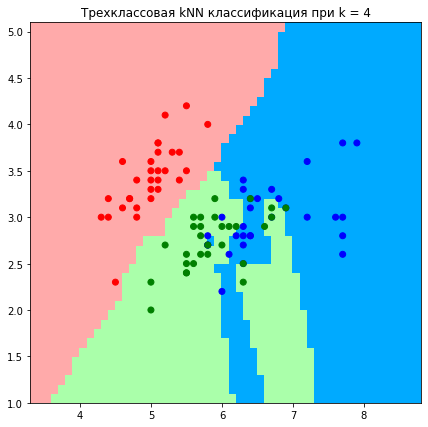

In [335]:
get_graph(X_train, y_train, k)

### Задание 2

#### Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [336]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=200, noise=0.05, random_state=1)

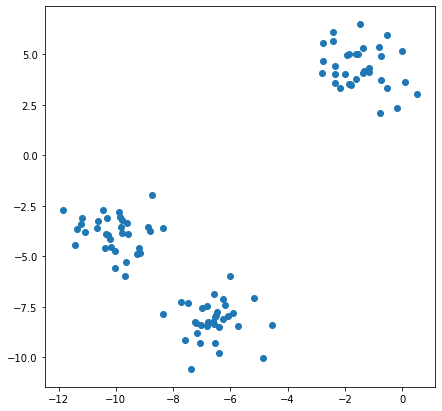

In [337]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

#### Метрика - Среднее квадратичное внутрикластерное расстояние

In [338]:
#---------------------------------------------------------------------------------------------------------
# Метрика - среднее квадратичное внутрикластерное расстояние
def e_metrics_mean_sq_dist(centroids, clusters, is_debug = False):
    
    result = 0
    for i, centroid in enumerate(centroids):

        cluster = clusters[i]
        d = np.sum(np.square(cluster - centroid)) / len(cluster)

        if (is_debug):
            print(f'cluster = {i}; d = {round(d, 6)}')

        result += d 
    return result
#---------------------------------------------------------------------------------------------------------

In [339]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        
        # кластеризуем объекты по центроидам
        for x in data:
            
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [340]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [341]:
#---------------------------------------------------------------------------------------------------------------------
# Функция отрисовки зависимости Среднего квадратичного внутрикластерноего расстояния от количества кластеров
def get_mean_sq_dist(sq_dist):
    
    plt.figure(figsize = (13, 6))
    plt.xlabel('Count of clusters', fontsize = 14)
    plt.ylabel('Mean square inner-cluster distance', fontsize = 14)
    
    plt.xlim(0,  len(sq_dist) + 1)
    
    plt.plot(sq_dist[:, 0], sq_dist[:, 1], linewidth = 5)

    for k in sq_dist[:, 0]:
        plt.axvline(x = k, linestyle='--', linewidth = 0.5, c = 'black')
    
    plt.title('Mean square inner-cluster distance and Count of clusters', fontsize = 16)
    plt.show()
#---------------------------------------------------------------------------------------------------------------------

In [342]:
# определим максимальное количество итераций
max_iterations = 10
# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

#---------------------------------------------------------------------------------------------------------------------
# перебор количества кластеров от 1 до 10
sq_dist = []
for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    sq_dist.append( [k, e_metrics_mean_sq_dist(centroids, clusters)] )

sq_dist = np.array(sq_dist)
sq_dist

array([[ 1.        , 41.18153778],
       [ 2.        , 10.88184909],
       [ 3.        ,  6.05474461],
       [ 4.        ,  5.40723801],
       [ 5.        ,  5.1357061 ],
       [ 6.        ,  5.78697717],
       [ 7.        ,  5.64720585],
       [ 8.        ,  5.85916122],
       [ 9.        ,  6.18813484],
       [10.        ,  6.35591858]])

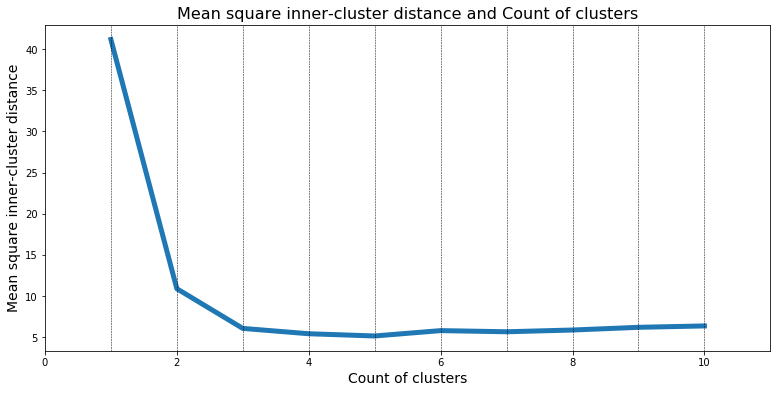

In [343]:
get_mean_sq_dist(sq_dist)

### Вывод
* Начиная с k = 3, среднее квадратичное внутрикластерное расстояние меняется незначительно. 
* Значит, k = 3 можно считать оптимальным количеством кластеров

### Задание 3

#### Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще)

In [344]:
import pandas as pd

In [345]:
#--------------------------------------------------------------------------------------------------------
# оставил один цикл по X_test
# второй цикл реализовал через DataFrame 
# def knn_optim(x_train, y_train, x_test, k, is_debug = False):
def knn_optim(df_train, y_train, x_test, k, is_debug = False):
    
    answers = []
    for x in X_test:

        # считаю все расстояния от x до каждого объекта X_train в df_train
        df_train['distance'] = np.sqrt((df_train['x1'] - x[0]) ** 2 + (df_train['x2'] - x[1]) ** 2)

        # первые k объектов (сортировка по расстоянию)
        # классический метод - вычисление наиболее часто встречающегося класса
        df_top = df_train.sort_values(by = 'distance').head(k)

        df_top_1 = df_top.groupby('y_train').agg({'y_train': ['count']}).reset_index()
        df_top_1.columns = ['y_train', 'count']

        class_pred = int(df_top_1.nlargest(1, 'count')['y_train'])

        answers.append(class_pred)

    return answers
#--------------------------------------------------------------------------------------------------------

In [346]:
# еще раз загружаю датасет
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [347]:
#--------------------------------------------------------------------------------------------------------
# теперь test_size=0.2,
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [348]:
# создаю DataFrame
df_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
df_train['y_train'] = y_train
df_train

,x1,x2,y_train
0,5.1,3.7,0
1,4.6,3.2,0
2,6.9,3.1,2
3,5.5,2.6,1
4,5.6,2.9,1
...,...,...,...
115,4.5,2.3,0
116,5.0,2.3,1
117,5.0,3.4,0
118,4.6,3.1,0


In [349]:
k = 4

# вызов классического метода knn
y_pred_task_1 = knn(X_train, y_train, X_test, k, 'classic', False)

# вызов оптимизированного метода knn
# y_pred_task_3 = knn_optim(X_train, y_train, X_test, k, False)
y_pred_task_3 = knn_optim(df_train, y_train, X_test, k, False)

df_result = pd.DataFrame(y_pred_task_1, columns = {'y_pred_task_1'})
df_result['y_pred_task_3'] = y_pred_task_3

df_result['difference'] =  df_result['y_pred_task_3'] - df_result['y_pred_task_1']
df_result

,y_pred_task_1,y_pred_task_3,difference
0,2,2,0
1,0,0,0
2,1,1,0
3,0,0,0
4,0,0,0
5,0,0,0
6,2,1,-1
7,2,2,0
8,1,1,0
9,1,1,0


### Вывод
* Есть несколько отличий с результатами из базового алгоритма.
* Но это связано с особенностями сортировки совпадающих значений в словаре и в DataFrame и способа их выбора для ответа.